Goals:
1. Developing proficiency in retrieving past stock prices using Python.
2. Analyzing stock price patterns and creating visual representations.
3. Collecting historical tweet data concerning a specific stock.
4. Conducting sentiment analysis on the collected tweets.
5. Exploring the potential for discovering predictive signals for stock prices via sentiment analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import plotly.graph_objects as go
from datetime import datetime

In [7]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [8]:
## Pulling stock

<IPython.core.display.Javascript object>

In [9]:
msft = yf.Ticker("MSFT")
info = msft.info
hist = msft.history(period="max")
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13 00:00:00-05:00,0.054792,0.062849,0.054792,0.060163,1031788800,0.0,0.0
1986-03-14 00:00:00-05:00,0.060163,0.063386,0.060163,0.062311,308160000,0.0,0.0
1986-03-17 00:00:00-05:00,0.062311,0.063923,0.062311,0.063386,133171200,0.0,0.0
1986-03-18 00:00:00-05:00,0.063386,0.063923,0.061237,0.061774,67766400,0.0,0.0
1986-03-19 00:00:00-05:00,0.061774,0.062311,0.060163,0.060700,47894400,0.0,0.0
...,...,...,...,...,...,...,...
2024-04-08 00:00:00-04:00,425.170013,427.279999,423.299988,424.589996,14272400,0.0,0.0
2024-04-09 00:00:00-04:00,426.440002,427.739990,421.619995,426.279999,12512300,0.0,0.0
2024-04-10 00:00:00-04:00,422.190002,424.029999,419.700012,423.260010,16216600,0.0,0.0


<IPython.core.display.Javascript object>

<Axes: xlabel='Date'>

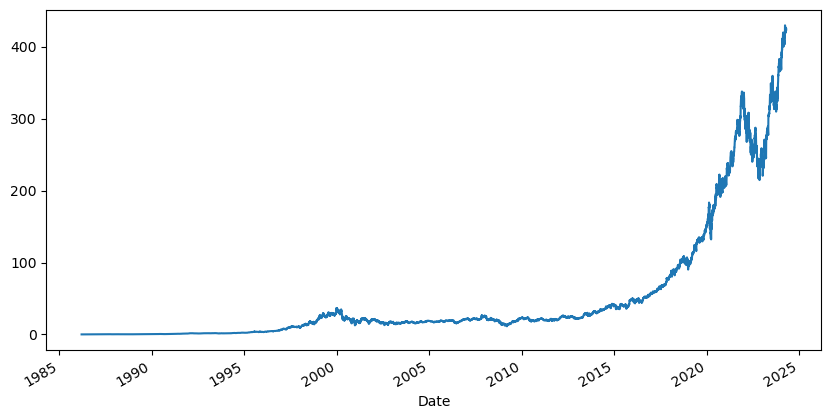

<IPython.core.display.Javascript object>

In [10]:
hist["Open"].plot(figsize=(10, 5))

In [11]:
msft.calendar

{'Dividend Date': datetime.date(2024, 6, 13),
 'Ex-Dividend Date': datetime.date(2024, 5, 15),
 'Earnings Date': [datetime.date(2024, 4, 26)],
 'Earnings High': 3.06,
 'Earnings Low': 2.78,
 'Earnings Average': 2.82,
 'Revenue High': 62059100000,
 'Revenue Low': 60274900000,
 'Revenue Average': 60772100000}

<IPython.core.display.Javascript object>

In [12]:
## Pull a bunch of stocks, conduct data parsing

<IPython.core.display.Javascript object>

In [13]:
import re

# data
data = """ CrowdStrike (CRWD -2.75%), $68 billion
PayPal (PYPL -1.84%), $66 billion
MercadoLibre (MELI -4.21%), $84 billion
Airbnb (ABNB -3.66%), $88 billion
Shopify (SHOP -2.19%), $105 billion
Intuitive Surgical (ISRG -1.9%), $128 billion
Walt Disney (DIS -2.68%), $165 billion
Berkshire Hathaway (BRK.A -1.39%)(BRK.B -1.07%), $797 billion
Amazon (AMZN -1.54%), $1.60 trillion
Alphabet (GOOGL -1.05%)(GOOG -1.0%), $1.79 trillion """

# define a regex pattern to extract ticker symbols

pattern = r"\(([A-Z]+)"

# use regex to find ticker symbols

tickers = re.findall(pattern, data)

tickers

['CRWD',
 'PYPL',
 'MELI',
 'ABNB',
 'SHOP',
 'ISRG',
 'DIS',
 'BRK',
 'BRK',
 'AMZN',
 'GOOGL',
 'GOOG']

<IPython.core.display.Javascript object>

In [14]:
hists = {}
for s in tickers:
    tkr = yf.Ticker(s)
    history = tkr.history(period='10y')
    hists[s] = history


<IPython.core.display.Javascript object>

In [15]:
temp_df = hists["GOOGL"].copy()
temp_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-04-14 00:00:00-04:00,27.183001,27.650999,27.025999,27.260000,50824000,0.0,0.0
2014-04-15 00:00:00-04:00,27.549999,27.644501,26.532000,27.434999,79956000,0.0,0.0
2014-04-16 00:00:00-04:00,27.885000,28.200001,27.655001,28.195000,91644000,0.0,0.0
2014-04-17 00:00:00-04:00,27.816000,27.850000,26.969999,27.167000,112294000,0.0,0.0
2014-04-21 00:00:00-04:00,27.200001,27.200001,26.700001,26.968500,48502000,0.0,0.0
...,...,...,...,...,...,...,...
2024-04-08 00:00:00-04:00,152.779999,155.270004,152.610001,154.850006,20702000,0.0,0.0
2024-04-09 00:00:00-04:00,156.089996,158.559998,155.190002,156.600006,31113000,0.0,0.0
2024-04-10 00:00:00-04:00,156.210007,156.610001,154.679993,156.139999,22838600,0.0,0.0


<IPython.core.display.Javascript object>

In [16]:
# try:
#     # Create Candlestick chart
#     fig = go.Figure(data=[go.Candlestick(x=temp_df.iloc[:, 0],
#                                           open=temp_df['Open'],
#                                           high=temp_df['High'],
#                                           low=temp_df['Low'],
#                                           close=temp_df['Close'])])
#     # Show the figure
#     fig.show()

# except Exception as e:
#     print("Error:", e)

<IPython.core.display.Javascript object>

In [ ]:
hists = {}
for stock in tickers:
    tkr = yf.Ticker(stock)
    history = tkr.history(period="10y")
    hists[s] = history
    temp_df = hists[s]

    try:
        # Create Candlestick chart
        fig = go.Figure(
            data=[
                go.Candlestick(
                    x=temp_df.index,
                    open=temp_df["Open"],
                    high=temp_df["High"],
                    low=temp_df["Low"],
                    close=temp_df["Close"],
                )
            ]
        )
        fig.update_layout(
            margin=dict(l=20, r=20, t=60, b=20),
            height=300,
            paper_bgcolor="LightSteelBlue",
            title=stock,
        )
        # Show the figure
        fig.show()

    except Exception as e:
        print("Error:", e)

In [18]:
## Pull tweets about each stock

<IPython.core.display.Javascript object>

In [19]:
hists["GOOG"]

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-04-14 00:00:00-04:00,26.838814,27.130512,26.405504,26.553099,51501009,0.0,0.0
2014-04-15 00:00:00-04:00,26.767509,26.848787,25.852022,26.748562,77101101,0.0,0.0
2014-04-16 00:00:00-04:00,27.075665,27.773746,26.926073,27.750811,97865955,0.0,0.0
2014-04-17 00:00:00-04:00,27.365368,27.399775,26.484785,26.731607,136190888,0.0,0.0
2014-04-21 00:00:00-04:00,26.731607,26.761526,26.208046,26.358631,51334553,0.0,0.0
...,...,...,...,...,...,...,...
2024-04-08 00:00:00-04:00,154.014999,156.654999,153.990005,156.139999,16641500,0.0,0.0
2024-04-09 00:00:00-04:00,157.350006,159.889999,156.639999,158.139999,21538100,0.0,0.0
2024-04-10 00:00:00-04:00,157.880005,158.160004,156.199997,157.660004,16339200,0.0,0.0


<IPython.core.display.Javascript object>

In [ ]:
# import twitter
# import configparser


# # Twitter API credentials
# config = configparser.ConfigParser()
# config.read("config.ini")

# api_key = config["twitter"]["api_key"]
# api_key_secret = config["twitter"]["api_key_secret"]

# access_token = config["twitter"]["access_token"]
# access_token_secret = config["twitter"]["access_token_secret"]

In [ ]:
# import tweepy
# from tqdm.notebook import tqdm


# # Authenticate with Twitter API
# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_token_secret)
# api = tweepy.API(auth)

# # Define the search query and date range
# query = f'${stock}'
# since_date = '2014-04-15'
# until_date = '2024-04-15'

# # Creating list to append tweet data
# tweets_list = []

# # Search for tweets containing the query within the date range
# for tweet in tqdm(api.search_tweets(q=query, since=since_date, until=until_date, count=100), total=12000):
#     tweets_list.append([tweet.created_at, tweet.id, tweet.text, tweet.user.screen_name])

# # Create a DataFrame from the tweets list
# tweet_df = pd.DataFrame(tweets_list, columns=["Datetime", "Tweet ID", "Text", "Username"])

# # Print the first few rows of the DataFrame
# tweet_df.head()

In [ ]:
# import libraries and packages
import twitter
import snscrape.modules.twitter as sntwitter
from tqdm.notebook import tqdm
import pandas
# Creating list to append tweet data
tweets_list = []
# Using TwitterSearchScaper to scrape data and append tweets to list
for i, tweet in tqdm(
    enumerate(
        sntwitter.TwitterSearchScraper(
            f"${stock} since:2014-04-15 until: 2024-04-15"
        ).get_items()), total=12000,):
    
    # declare a username
    if i > 12000:  # number of tweets you want to scrape
        break
    tweets_list.append(
        [tweet.date, tweet.id, tweet.content, tweet.user.username]
    )  # declare the attribute to be returned
# create a dataframe from the tweets list above

tweet_df = pd.DataFrame(
    tweets_list, columns=["Datetime", "Tweet ID", "Text", "Username"]
)


In [ ]:
tweets_df.tails()

In [ ]:
tweet_df['Text'].values()

In [ ]:
tweet_df['Datetime'].min()

In [ ]:
## sentiment analysis prep

In [3]:
from transformers import pipeline

model = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
sentiment_task = pipeline("sentiment-analysis", model=model)
sentiment_task('Bullish market!')

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'label': 'positive', 'score': 0.8514195680618286}]

In [ ]:
from tqdm.notebook import tqdm
sentiment_results = {}
count = 0
for i, d in tqdm(tweet_df.iterrows(), total = len(tweet_df)) :    
    key = d['Tweet Id']
    sentiment_results[key] = sentiment_task(d['Text'])
    count+=1
    if count == 500:
        break

In [ ]:
sentiment_df = pd.DataFrame(sentiment_results).T
sentiment_df['label']= sentiment_df[0].apply(lambda x:x['label'])
sentiment_df['score']= sentiment_df[0].apply(lambda x:x['score'])
sentiment_df=sentiment_df.merge(tweet_df.set_index('Tweet Id'), left_index = True, right_index=True)
sentiment_df.loc[sentiment_df['label']== 'Negative', 'score'] *= -1

In [ ]:
sentiment_df.groupby('label')['score'].plot(kind='hist', bins=50)
plt.legend()
plt.show()

In [ ]:
sentiment_df['Date'] = sentiment_df['Datetime'].dt.date
sentiment_daily = sentiment_df.groupby('Date')['score'].mean()
stock_df = hists['GOOGL'].copy()
stock_df = stock_df.reset_index()
stock_df['Date'] = stock_df['Date'].dt.date
stock_df = stock_df.set_index('Date')
sentiment_and_stock = sentiment_daily.to_frame('sentiment').merge(stock_df, left_index=True, right_index=True)

ax = sentiment_and_stock['sentiment'].plot(legend='Sentiment')
ax2 = ax.twin()
sentiment_and_stock['Close'].plot(ax=ax2, color = 'orange', legend='Closing Price')
plt.show()